In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt             
%matplotlib inline     
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df= pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})


In [57]:
df=df.replace('?',np.nan )


In [58]:
#Finding what percentage of data is missing from the dataset

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
occupation,1843,5.7
workclass,1836,5.6
age,0,0.0
education,0,0.0
marital.status,0,0.0


In [10]:
df['occupation'].describe()


count              32561
unique                15
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [11]:
df['occupation'] = df['occupation'].fillna('Prof-specialty')


In [12]:
df['workclass'].describe()


count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

In [13]:
df['workclass'] = df['workclass'].fillna('Private')


In [14]:
df['native.country'].describe()


count             32561
unique               42
top       United-States
freq              29170
Name: native.country, dtype: object

In [15]:
df['native.country'] = df['native.country'].fillna('United-States')


In [16]:
df.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [17]:
df.describe(include=["O"])


,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


In [18]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()

NameError: ignored

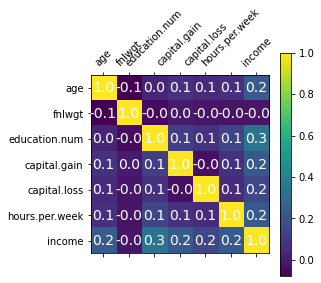

In [19]:
#Ploting the correlation between the output(income) and individual features

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [20]:
df.drop(['fnlwgt'], axis = 1, inplace = True)


In [21]:
dataset=df.copy()


In [22]:
dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])


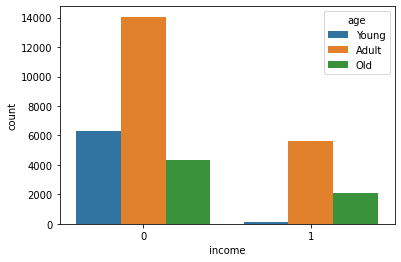

In [23]:
sns.countplot(x = 'income', hue = 'age', data = dataset)


In [24]:
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income

dataset['Capital Diff'] = dataset['capital.gain'] - dataset['capital.loss']
dataset.drop(['capital.gain'], axis = 1, inplace = True)
dataset.drop(['capital.loss'], axis = 1, inplace = True)

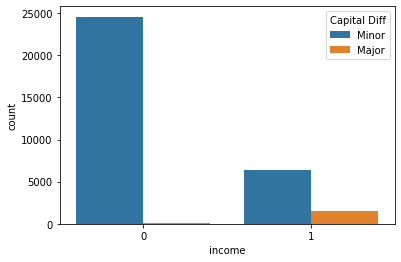

In [25]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'income', hue = 'Capital Diff', data = dataset)

In [26]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income

dataset['Hours per Week'] = pd.cut(dataset['hours.per.week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

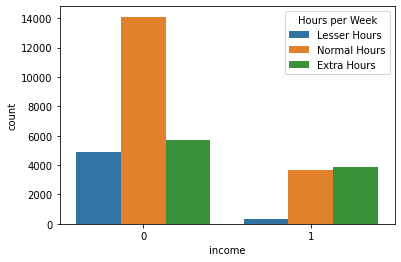

In [27]:
sns.countplot(x = 'income', hue = 'Hours per Week', data = dataset)


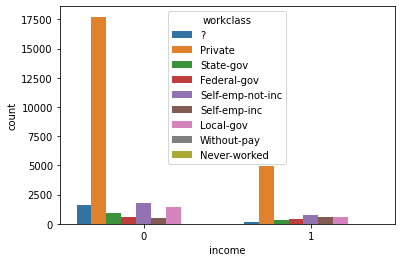

In [28]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'income', hue = 'workclass', data = dataset)

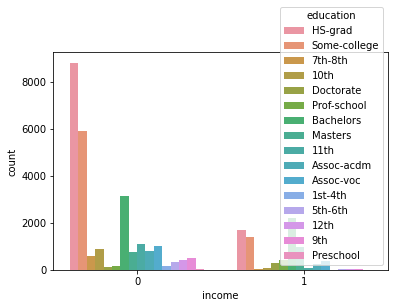

In [29]:
#Plot of education corresponding to income

sns.countplot(x = 'income', hue = 'education', data = dataset)

In [30]:
#Combining the lower grades of education together

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

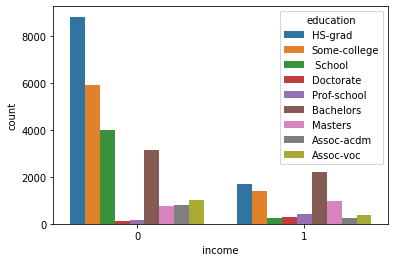

In [31]:
sns.countplot(x = 'income', hue = 'education', data = df)

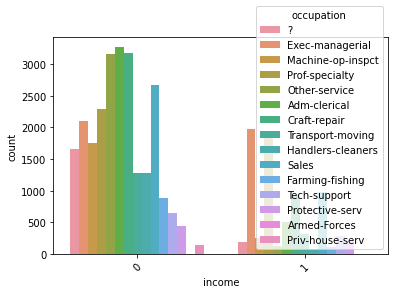

In [32]:
#Plot of occupation corresponding to the income

plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = dataset)

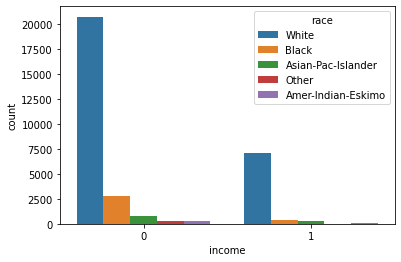

In [33]:
sns.countplot(x = 'income', hue = 'race', data = dataset)


In [34]:

df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

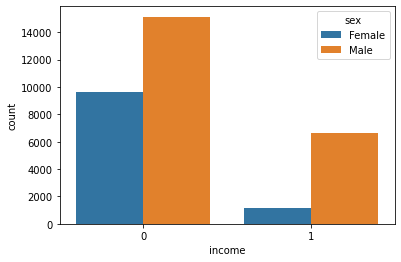

In [35]:
#Plot of sex corresponding to income

sns.countplot(x = 'income', hue = 'sex', data = dataset)

In [36]:
count = dataset['native.country'].value_counts()
count

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

Text(0.5, 1.0, 'Count from each Country')

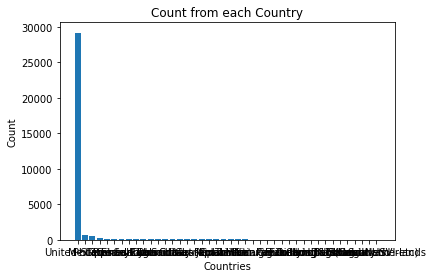

In [37]:
#Plot of Country corresponding to income


plt.bar(count.index, count.values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')

In [38]:
#Combining all other into one class

countries = np.array(dataset['native.country'].unique())
countries = np.delete(countries, 0)

In [39]:
dataset['native.country'].replace(countries, 'Other', inplace = True)
df['native.country'].replace(countries, 'Other', inplace = True)

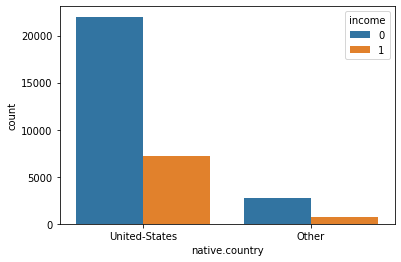

In [40]:
sns.countplot(x = 'native.country', hue = 'income', data = dataset)

In [41]:
#Splitting the data set into features and outcome

X = df.drop(['income'], axis=1)
Y = df['income']

In [42]:
X.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,HS-grad,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,?,Some-college,Widowed,?,Unmarried,Other,Female,0,4356,40,United-States
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [43]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [45]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [46]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [47]:
X_train.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.134215,-0.577377,-0.402341,-0.600270,2.214196,0.412408,-1.430470,-0.145189,-0.217407,-1.662414,0.342505
1,0.028248,-1.279379,0.193090,-0.402341,0.109933,-0.899410,0.412408,0.699071,-0.145189,-0.217407,-0.200753,0.342505
2,0.247956,0.086059,1.348790,0.926666,-0.600270,-0.276689,0.412408,-1.430470,-0.145189,-0.217407,-0.038346,0.342505
3,-0.850587,-1.279379,0.193090,0.926666,-0.363535,0.968753,0.412408,0.699071,-0.145189,-0.217407,-0.038346,0.342505
4,-0.044989,-1.962098,0.578323,-0.402341,-0.600270,-0.899410,0.412408,0.699071,-0.145189,-0.217407,-0.038346,0.342505


In [48]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [49]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [50]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

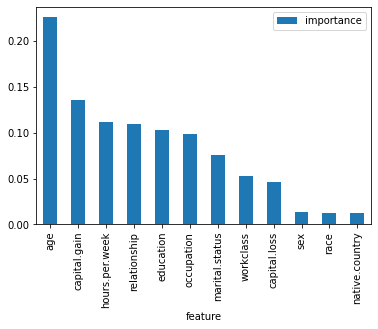

In [51]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()


In [52]:
#Since they hardly have any significance, can drop these columns to avoid overfitting

df  = df.drop("sex", axis=1)
df  = df.drop("race", axis=1)
df  = df.drop("native.country", axis=1)

In [53]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [55]:
acc_decision_tree

98.05

In [59]:
df

,age,workclass,education,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,income
0,90,NaN,HS-grad,Widowed,NaN,Not-in-family,0,4356,40,0
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,0,4356,18,0
2,66,NaN,Some-college,Widowed,NaN,Unmarried,0,4356,40,0
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,0,3900,40,0
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,0,3900,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,0,0,40,0
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,0,0,38,0
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,1
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,0,0,40,0
